In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("ds_salaries.csv")

In [3]:
df.shape

(607, 12)

In [4]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [13]:
df.columns.tolist()

['Unnamed: 0',
 'work_year',
 'experience_level',
 'employment_type',
 'job_title',
 'salary',
 'salary_currency',
 'salary_in_usd',
 'employee_residence',
 'remote_ratio',
 'company_location',
 'company_size']

In [8]:
list(df)

['Unnamed: 0',
 'work_year',
 'experience_level',
 'employment_type',
 'job_title',
 'salary',
 'salary_currency',
 'salary_in_usd',
 'employee_residence',
 'remote_ratio',
 'company_location',
 'company_size']

In [9]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [14]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [17]:
# Alterando a notação científica ("e" notation)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [18]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.00,607.00,607.00,607.00,607.00
mean,303.00,2021.41,324000.06,112297.87,70.92
std,175.37,0.69,1544357.49,70957.26,40.71
min,0.00,2020.00,4000.00,2859.00,0.00
25%,151.50,2021.00,70000.00,62726.00,50.00
50%,303.00,2022.00,115000.00,101570.00,100.00
75%,454.50,2022.00,165000.00,150000.00,100.00
max,606.00,2022.00,30400000.00,600000.00,100.00


## Algumas observações iniciais

O período compreendido é de 2020 a 2022.<br>
Temos 607 rows.<br>
O salário médio é de 112297.87 (USD).<br>
O salário mínimo foi de 2859.00, o que parece ser muito baixo. Analisar para ver se não é valor errado.<br>
Mediana foi de 101570.00.<br>
O maior valor foi de 600,000.00... pensei que poderia ser maior.<br>

In [43]:
# Sorting por job_title
df_sorted_job_title = df.sort_values(by='job_title')

In [44]:
df_sorted_job_title

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
77,77,2021,MI,PT,3D Computer Vision Researcher,400000,INR,5409,IN,50,IN,M
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L
96,96,2021,EN,PT,AI Scientist,12000,USD,12000,BR,100,US,S
113,113,2021,EN,PT,AI Scientist,12000,USD,12000,PK,100,US,M
244,244,2021,EN,FT,AI Scientist,1335000,INR,18053,IN,100,AS,S
...,...,...,...,...,...,...,...,...,...,...,...,...
508,508,2022,EN,FT,Research Scientist,120000,USD,120000,US,100,US,L
507,507,2022,MI,FT,Research Scientist,59000,EUR,64849,AT,0,AT,L
26,26,2020,EN,FT,Research Scientist,42000,USD,42000,NL,50,NL,L
236,236,2021,MI,FT,Research Scientist,80000,CAD,63810,CA,100,CA,M


In [53]:
# Checando os salários BR
df.loc[df['employee_residence'] == "BR"].sort_values(by='salary_in_usd', ascending=False)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
149,149,2021,SE,FT,Cloud Data Engineer,160000,USD,160000,BR,100,US,S
494,494,2022,SE,FT,Data Scientist,100000,USD,100000,BR,100,US,M
133,133,2021,SE,FT,Computer Vision Engineer,24000,USD,24000,BR,100,BR,M
271,271,2021,SE,FT,Computer Vision Engineer,102000,BRL,18907,BR,0,BR,M
205,205,2021,MI,FT,Data Scientist,69600,BRL,12901,BR,0,BR,S
96,96,2021,EN,PT,AI Scientist,12000,USD,12000,BR,100,US,S


Para entender isso, tem que olhar para a coluna company_location. Os BRs ganhando mais trabalham no US.

In [55]:
# Checando os salários de COMPANHIAS localizadas no BR
df.loc[df['company_location'] == "BR"].sort_values(by='salary_in_usd', ascending=False)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
133,133,2021,SE,FT,Computer Vision Engineer,24000,USD,24000,BR,100,BR,M
271,271,2021,SE,FT,Computer Vision Engineer,102000,BRL,18907,BR,0,BR,M
205,205,2021,MI,FT,Data Scientist,69600,BRL,12901,BR,0,BR,S


## Criando um pie chart para as áreas de Data Science

In [65]:
# contando quanto cada área aparece (job_title)
df.job_title.value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

<AxesSubplot:title={'center':'Areas of Data Science Jobs'}, ylabel='job_title'>

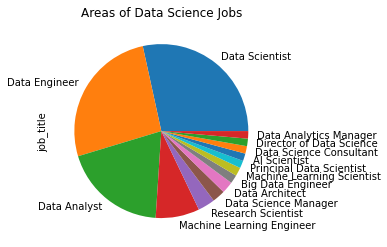

In [68]:
# Criando o pie chart apenas para as áreas com incidência maior que 6
df.job_title.value_counts()[df.job_title.value_counts() > 6].plot.pie(title='Areas of Data Science Jobs')

## Que perguntas são interessantes aqui?
- Quais as áreas mais bem remuneradas?
- Qual a diferença salarial entre as different:
    - experience levels?
    - company locations?
    - residence locations?
    - company sizes?
    - employment type?
    - quão preciso um modelo preditor de renda seria nesse (small) dataset?
- Como está a proporção de trabalhos remotos?
- Tem alguma relação entre trabalho remoto e senioridade?

## To do
- Criar diferentes tipos de charts -> experimentar bokeh/holoviz e seaborn

## Quais são as áreas mais bem remuneradas?

Aqui temos que tomar cuidado com a metodologia de cálculo: simplesmente tirar a média pode ser ineficaz, posto que um único outlier pode remover o significado do indicador.

Além disso, temos muitos job_title com poucos exemplos... Estes provavelmente devemos também desconsiderar.

In [77]:
df1 = df[['job_title','salary_in_usd']].groupby(by='job_title')

In [96]:
df1.describe().sort_values(by=('salary_in_usd', 'count'), ascending=False).head(15)

salary_in_usd                               \
                                   count      mean      std       min   
job_title                                                               
Data Scientist                    143.00 108187.83 64112.84   2859.00   
Data Engineer                     132.00 112725.00 57629.08   4000.00   
Data Analyst                       97.00  92893.06 39961.08   6072.00   
Machine Learning Engineer          41.00 104880.15 63218.63  20000.00   
Research Scientist                 16.00 109019.50 98542.76  42000.00   
Data Science Manager               12.00 158328.50 52589.18  54094.00   
Data Architect                     11.00 177873.91 45714.72  90700.00   
Big Data Engineer                   8.00  51974.00 42954.76   5882.00   
Machine Learning Scientist          8.00 158412.50 79514.71  12000.00   
Director of Data Science            7.00 195074.00 70015.79 130026.00   
AI Scientist                        7.00  66135.57 70152.16  12000.00   
Principal Data Scientist            7.00 215242.43 94705.04 148261.00   
Data Science Consultant             7.00  69420.71 30961.65   5707.00   
Data Analytics Manager              7.00 127134.29 17853.38 105400.00   
Computer Vision Engineer            6.00  44419.33 42984.85  10000.00   

                                                                    
                                 25%       50%       75%       max  
job_title                                                           
Data Scientist              54724.00 103691.00 140850.00 412000.00  
Data Engineer               70039.50 105500.00 154600.00 324000.00  
Data Analyst                62000.00  90320.00 116150.00 200000.00  
Machine Learning Engineer   51064.00  87932.00 150000.00 250000.00  
Research Scientist          62176.00  76263.50 105000.00 450000.00  
Data Science Manager       142285.25 155750.00 178050.00 241000.00  
Data Architect             148900.00 180000.00 200669.50 266400.00  
Big Data Engineer           17557.00  41305.50  79756.00 114047.00  
Machine Learning Scientist 118075.00 156500.00 225000.00 260000.00  
Director of Data Science   147756.50 168000.00 223489.50 325000.00  
AI Scientist                15026.50  45896.00  87500.00 200000.00  
Principal Data Scientist   156837.00 173762.00 227500.00 416000.00  
Data Science Consultant     66786.00  76833.00  83416.50 103000.00  
Data Analytics Manager     114640.00 120000.00 142500.00 150260.00  
Computer Vision Engineer    20180.25  26304.50  52152.25 125000.00

## calculando média salário data scientist na mão

In [111]:
total_salarios_data_scientist_apenas = df.salary_in_usd.loc[df.job_title.isin(['Data Scientist'])].sum()
total_individuos_data_scientist = df.salary_in_usd.loc[df.job_title.isin(['Data Scientist'])].count()

media_data_scientist = total_salarios_data_scientist_apenas / total_individuos_data_scientist

print(media_data_scientist)

108187.83216783217


Aqui na verdade, primeiro temos que analisar para ver se tem potenciais outliers